# Linear Regression
## Question 1
Make a class called LinearRegression which provides two functions : fit and predict. Try to implement it from scratch. If stuck, refer to the examples folder.

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class LinearRegressionScratch:
    def __init__(self, epochs, lr):
        self.weights = None
        self.bias = None
        self.epochs = epochs
        self.lr = lr


    def fit(self, X, y):
        '''
        shape of X = (m, n)
        shape of y = (n, 1)
        '''
        
        m, n = X.shape
        self.weights = np.random.randn(n).reshape(n, 1)
        self.bias = np.random.rand()

        for epoch in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            dW = -np.dot(X.T, y-y_pred)/m
            db = -np.sum(y-y_pred)/m
            self.weights = self.weights - self.lr * dW
            self.bias = self.bias - self.lr * db


    def predict(self, X):
        return np.dot(X, self.weights)+self.bias


## Question 2

Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the model created in question 1 and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs) to achieve losses close to that of the sklearn models.

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

In [73]:
df = pd.read_csv("D:\\Skills\\ACM Sigchi\\Week 1\\ML\\Real estate.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [74]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [75]:
df = df.drop(columns=['No'])
columns = list(df.columns)

y = df.pop('Y house price of unit area')
X = df

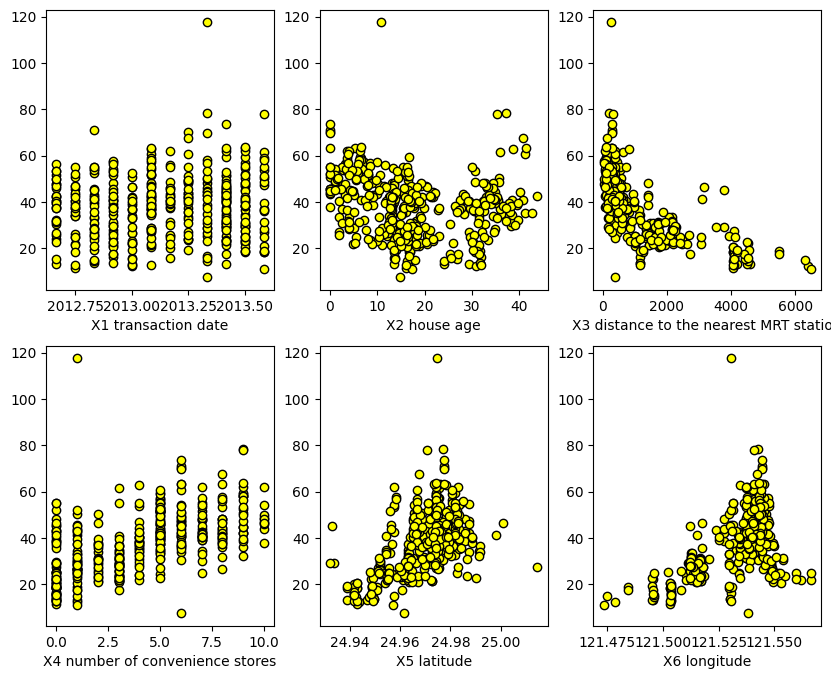

In [76]:
fig, axes = plt.subplots(2, 3, figsize=(10, 8))
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.scatter(X.iloc[:, i], y, color='yellow', edgecolors='black')
    ax.set_xlabel(columns[i])

plt.show()

In [77]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

y_train = np.array(y_train).reshape(len(y_train), 1)
y_test = np.array(y_test).reshape(len(y_test), 1)

In [78]:
model = LinearRegressionScratch(lr=0.01, epochs=5000)
model.fit(X_train, y_train)

In [79]:
y_pred = model.predict(X_test)

In [80]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_pred=y_pred, y_true=y_test)
mse = mean_squared_error(y_pred=y_pred, y_true=y_test)

print("My Model")
print(f"R2 Score : {r2}")
print(f"MSE      : {mse}")

My Model
R2 Score : 0.5853721407699657
MSE      : 65.76769447753597


In [81]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [83]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_pred=y_pred, y_true=y_test)
mse = mean_squared_error(y_pred=y_pred, y_true=y_test)

print("Sklearn Model")
print(f"R2 Score : {r2}")
print(f"MSE      : {mse}")

Sklearn Model
R2 Score : 0.5796624182861628
MSE      : 66.67336271836186


# Logistic Regression
## Question 3

The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.

In [91]:
from sklearn.datasets import load_breast_cancer
import pandas as pd


data = load_breast_cancer()

X = np.array(data.data)
y = np.array(data.target)


In [94]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

5. Write code for the sigmoid function and Logistic regression.


In [93]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    a = sigmoid(z)
    return a * (1 - a)

class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        # Initialize the hyperparameters of the model
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        self.weights = np.random.randn(n_features, 1)
        self.bias = np.random.randn()

        # Implement the gradient descent algorithm
        for _ in range(self.epochs):
            
            z = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(z)

            dw = np.dot(X.T, (y_pred - y)) / n_samples
            db = np.sum(y_pred - y) / n_samples

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        
        z = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(z)
        
        return (y_pred > 0.5).astype(int)


6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .

In [106]:
model = LogisticRegressionScratch(learning_rate=0.1, epochs=10000)
model.fit(X=X_train, y=y_train)

y_pred = model.predict(X=X_test)

In [107]:
from sklearn.metrics import accuracy_score
print("My Model")
print(f"accuracy = {100*accuracy_score(y_pred=y_pred, y_true=y_test)}%")

My Model
accuracy = 97.2027972027972%


In [108]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [109]:
print("Sklearn Model")
print(f"accuracy = {100*accuracy_score(y_pred=y_pred, y_true=y_test)}%")

Sklearn Model
accuracy = 98.6013986013986%


9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .

In [110]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_pred=y_pred, y_true=y_test))
print(confusion_matrix(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        54
           1       0.98      1.00      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143

[[52  2]
 [ 0 89]]


# KNN
## Question 4

How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass".

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [111]:
df = pd.read_csv("D:\\Skills\\ACM Sigchi\\Week 1\\ML\\glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [112]:
y = df.pop('Type')
X = df

In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [116]:
y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)

(160,)

4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

In [126]:
def Distance(p1, p2):
    return np.sum((p1-p2) ** 2)


def kNN(X_train, y_train, X_test, k):
    y_pred = []
    for i in range(len(X_test)):
        distances = []
        for j in range(len(X_train)):
            p1, p2 = np.array(X_test.iloc[i, :]), np.array(X_train.iloc[j, :])
            distances.append(Distance(p1, p2))
        df_temp = pd.DataFrame({
                           'class' : y_train,
                           'distance' : distances
                          })
        
        df_temp = df_temp.sort_values(by='distance')
        
        k_nearest_classes = list(df_temp['class'][:k])
        most_common_class = max(set(k_nearest_classes), key=k_nearest_classes.count)
        y_pred.append(most_common_class)
    
    return np.array(y_pred)

In [134]:
y_pred = kNN(X_train=X_train, y_train=y_train, X_test=X_test, k=3)

In [137]:
from sklearn.metrics import accuracy_score
print("My Model")
print(accuracy_score(y_pred=y_pred, y_true=y_test))

My Model
0.7037037037037037


7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [138]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [139]:
accuracy = knn.score(X_test, y_test)
print("Sklearn Model")
print(accuracy)

Sklearn Model
0.7037037037037037
